Script de génération des graphiques :

1 - imports et lecture des données

In [119]:
import matplotlib.pyplot as plt

ASPg  = open('data/ASPGripper.txt','r')
BAPTg  = open('data/BAPTGripper.txt','r')
    
ASPg_t = ASPg.readlines()
BAPTg_t = BAPTg.readlines()

2 - récupération des données
    (itération sur les fichiers textes et création des vecteurs de données)

In [120]:
values_ASP = []
values_BAPT = []
pb_ASP = []
pb_BAPT = []


for i in range(len(ASPg_t)) : #on itere sur les lignes dans le texte
    if (ASPg_t[i][1] != '\n') : #si la ligne a plus de 0 caractère
        for j in range(len(ASPg_t[i])) : #on itere sur les caractère dans la ligne
            if (ASPg_t[i][j] == 's') : #si le caractère = s
                values_ASP.append(ASPg_t[i][j-6:j-1])
                pb_ASP.append(ASPg_t[i-1][0] + ASPg_t[i-1][1])  
                break       

            
for i in range(len(BAPTg_t)-1) : #on itere sur les lignes dans le texte 
    if (BAPTg_t[i][1] != '\n') : 
        for j in range(len(BAPTg_t[i])) : #on itere sur les caractère dans la ligne
            if (BAPTg_t[i][j] == 's') : #si le caractère = s
                values_BAPT.append(BAPTg_t[i][j-6:j-1])
                pb_BAPT.append(BAPTg_t[i-1][0] + BAPTg_t[i-1][1])
                break 
        
print(values_ASP)
print(values_BAPT)
print(pb_ASP)
print(pb_BAPT)

[' 0,07', ' 0,13', ' 0,40', ' 1,44', ' 8,50', '72,67']
[' 0,05', ' 0,05']
['1\n', '2\n', '3\n', '4\n', '5\n', '6\n']
['1\n', '2\n']


3 - Traitement des données pour intergration gaphique
    (nettoyage et typage des données)

In [121]:
for i in range(len(values_ASP)) :
    if isinstance(values_ASP[i], float) : break
    if isinstance(values_ASP[i], str) :
        values_ASP[i] = values_ASP[i].replace(' ', "")
        values_ASP[i] = values_ASP[i].replace(',', '.')
        values_ASP[i] = float(values_ASP[i])
    else : values_ASP[i] = 0

for i in range(len(values_BAPT)) :
    if isinstance(values_BAPT[i], float) : break
    if isinstance(values_BAPT[i], str) :
        values_BAPT[i] = values_BAPT[i].replace(' ', "")
        values_BAPT[i] = values_BAPT[i].replace(',', '.')
        values_BAPT[i] = float(values_BAPT[i])
    else : values_BAPT[i] = 0 
    
for i in range(len(pb_ASP)) :
    if isinstance(pb_ASP[i], int) : break
    if isinstance(pb_ASP[i], str) :
        pb_ASP[i] = pb_ASP[i].replace('\n', "")
        pb_ASP[i] = pb_ASP[i].replace(',', '.')
        pb_ASP[i] = int(pb_ASP[i])    
    else : pb_ASP[i] = 0  
    
for i in range(len(pb_BAPT)) :
    if (isinstance(pb_BAPT[i] , int)) : break
    if isinstance(pb_BAPT[i] , str) :
        pb_BAPT[i] = pb_BAPT[i].replace('\n', "")
        pb_BAPT[i] = pb_BAPT[i].replace(',', '.')
        pb_BAPT[i] = int(pb_BAPT[i])
    else : pb_BAPT[i] = 0
        
print(values_ASP)
print(values_BAPT)
print(pb_ASP)
print(pb_BAPT)

[0.07, 0.13, 0.4, 1.44, 8.5, 72.67]
[0.05, 0.05]
[1, 2, 3, 4, 5, 6]
[1, 2]


4 - Génération du graphe

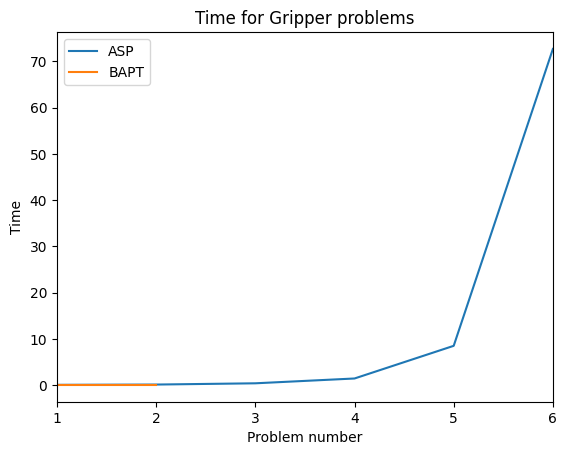

In [122]:
max_value = max(max(values_ASP),max(values_BAPT))
max_pb = max(len(pb_ASP),len(pb_BAPT))

plt.xlim(1,max_pb) 
plt.xlabel("Problem number")

#plt.ylim(0,float(max_value))
plt.yscale("linear")
plt.ylabel("Time")
plt.title("Time for Gripper problems")

plt.plot(pb_ASP,values_ASP, label = "ASP")
plt.plot(pb_BAPT,values_BAPT, label = "BAPT")


plt.savefig("graph/timeGripper.png")
plt.legend()
plt.show()
